In [5]:
from DynGenModels.configs.registered_experiments import Config_JetClass_EPiC_CondFlowMatch, Config_JetClass_DeepSets_CondFlowMatch
from DynGenModels.models.experiment import Experiment

cfm = Experiment(Config_JetClass_DeepSets_CondFlowMatch,
                 NAME = 'qcd_to_top_OT',
                 DATA_SOURCE = 'qcd',
                 DATA_TARGET = 'top',
                 DYNAMICS = 'OptimalTransportFlowMatching',
                 DATA_SPLIT_FRACS = [0.8, 0.2, 0.0],
                 PREPROCESS = ['normalize', 'logit_transform', 'standardize'],
                 BATCH_SIZE = 128,
                 EPOCHS = 2,
                 LR = 1e-4,
                 DIM_HIDDEN = 128,
                 DIM_TIME_EMB = 16,
                 ACTIVATION = 'ReLU',
                 NUM_LAYERS_PHI = 3,
                 NUM_LAYERS_RHO = 3,
                 DROPOUT = 0.0,
                 SIGMA = 0.0,
                 SOLVER ='midpoint',
                 NUM_SAMPLING_STEPS = 100,
                 DEVICE = 'cuda:1',)

cfm.train()


#===========================================================================================================
INFO: created directory: ../../results/qcd_to_top_OT.OptimalTransportFlowMatching.DeepSets.2024.02.15_21h21
#===========================================================================================================
+---------------------+-------------------------------------------------+
| Parameters          | Values                                          |
+---------------------+-------------------------------------------------+
| NAME                | qcd_to_top_OT                                   |
| DATASET             | jetclass                                        |
| DATA_SOURCE         | qcd                                             |
| DATA_TARGET         | top                                             |
| NUM_CONSTITUENTS    | 30                                              |
| FEATURES            | ['pt_rel', 'eta_rel', 'phi_rel']                |
| PREPRO

number of training parameters: 101763
number of training parameters: 101763
start training...
start training...


INFO: building dataloaders...
INFO: train/val/test split ratios: 0.8/0.2/0.0
INFO: train size: 80000, validation size: 20000, testing sizes: 0


epochs:   0%|          | 0/2 [00:00<?, ?it/s]

In [6]:
from DynGenModels.datamodules.jetclass.dataprocess import PostProcessJetClassData as PostProcessor
cfm.generate_samples(cfm.dataset.source_preprocess[:10000], PostProcessor=PostProcessor)

INFO: neural ODE solver with midpoint method and steps=100


  0%|          | 0/79 [00:00<?, ?it/s]

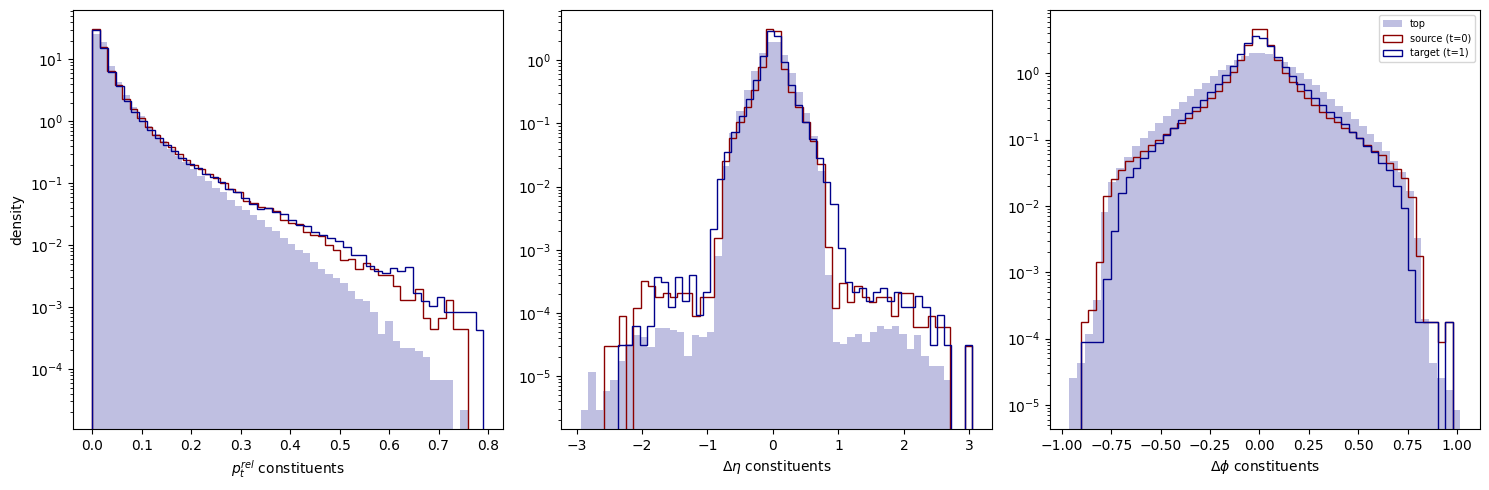

In [7]:
from utils import plot_jet_trajectories

plot_jet_trajectories(cfm)

In [33]:
import torch
x = torch.rand(10,3)
t = torch.rand(10)